In [1]:
# 02_clustering.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sns.set(style="whitegrid", context="notebook")

RAW_CSV = "../data/processed/final_master.csv"
df = pd.read_csv(RAW_CSV)

PCA_CSV = "../data/modeling/berlin_pca/berlin_subdistricts_pca.csv"
dfp = pd.read_csv(PCA_CSV)

id_col = "ortsteil"
pc_cols = [c for c in dfp.columns if c.startswith("PC")]

X = dfp[pc_cols].values
ids = dfp[id_col].copy()

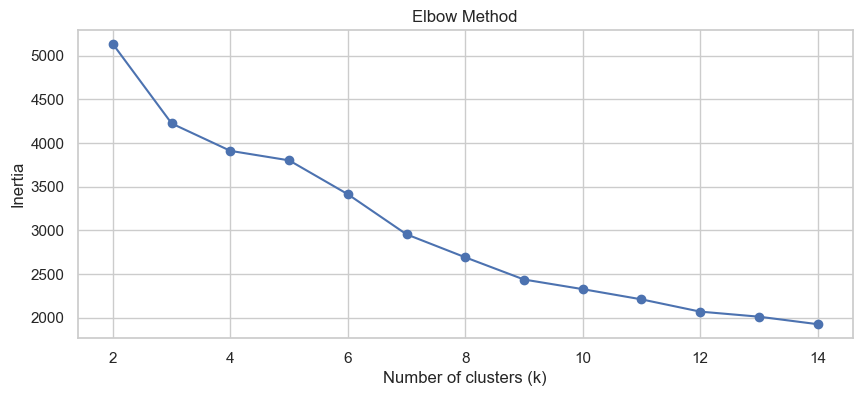

In [2]:
# Run KMeans for a range of cluster numbers
inertia = []
silhouette_scores = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Curve (Inertia)
plt.figure(figsize=(10, 4))
plt.plot(K, inertia, 'o-', label="Inertia")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

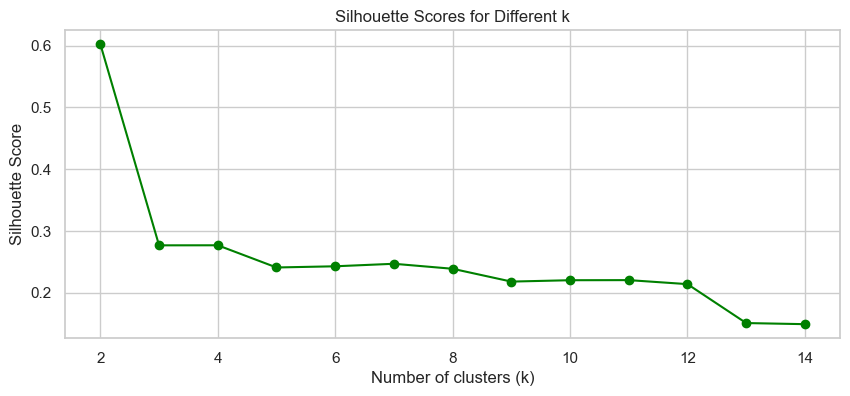

In [3]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(K, silhouette_scores, 'o-', color="green", label="Silhouette Score")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()

In [11]:
# Train KMeans with k=5 and k=8
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_8 = KMeans(n_clusters=8, random_state=42)

labels_4 = kmeans_4.fit_predict(X)
labels_5 = kmeans_5.fit_predict(X)
labels_8 = kmeans_8.fit_predict(X)

# Create a copy to compare both clusterings
df_clusters = dfp[[id_col]].copy()
df_clusters["k4_cluster"] = labels_4
df_clusters["k5_cluster"] = labels_5
df_clusters["k8_cluster"] = labels_8

# Number of subdistricts per cluster
print(df_clusters["k4_cluster"].value_counts().sort_index())
print(df_clusters["k5_cluster"].value_counts().sort_index())
print(df_clusters["k8_cluster"].value_counts().sort_index())

k4_cluster
0    57
1     5
2    32
3     2
Name: count, dtype: int64
k5_cluster
0    51
1     1
2    36
3     1
4     7
Name: count, dtype: int64
k8_cluster
0    51
1     1
2    34
3     6
4     1
5     1
6     1
7     1
Name: count, dtype: int64


In [12]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X["PC1"], y=X["PC2"], hue=labels, palette="tab10", s=60)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


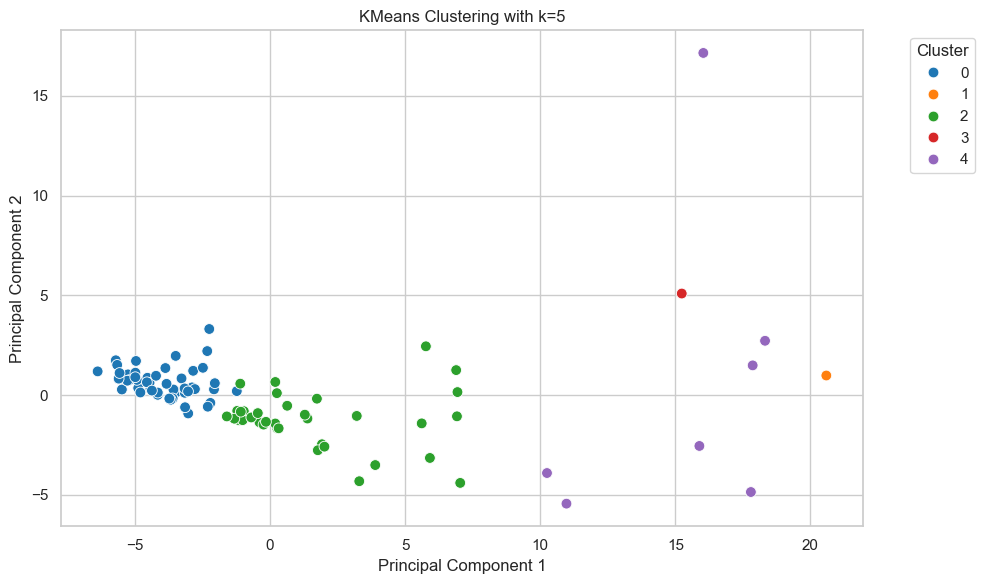

In [13]:
# plot kmeans = 5
plot_clusters(dfp[pc_cols], labels_5, "KMeans Clustering with k=5")

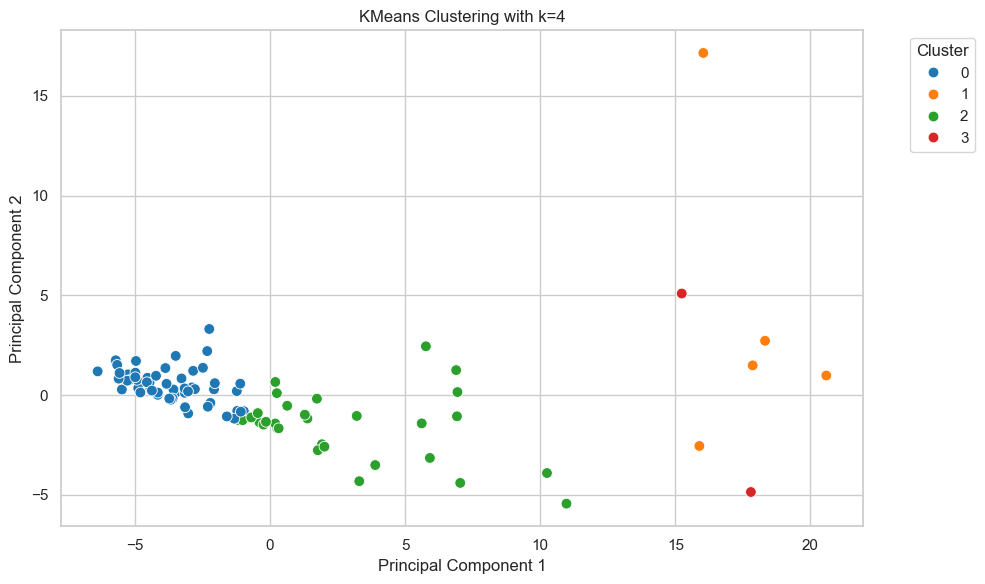

In [14]:
plot_clusters(dfp[pc_cols], labels_4, "KMeans Clustering with k=4")

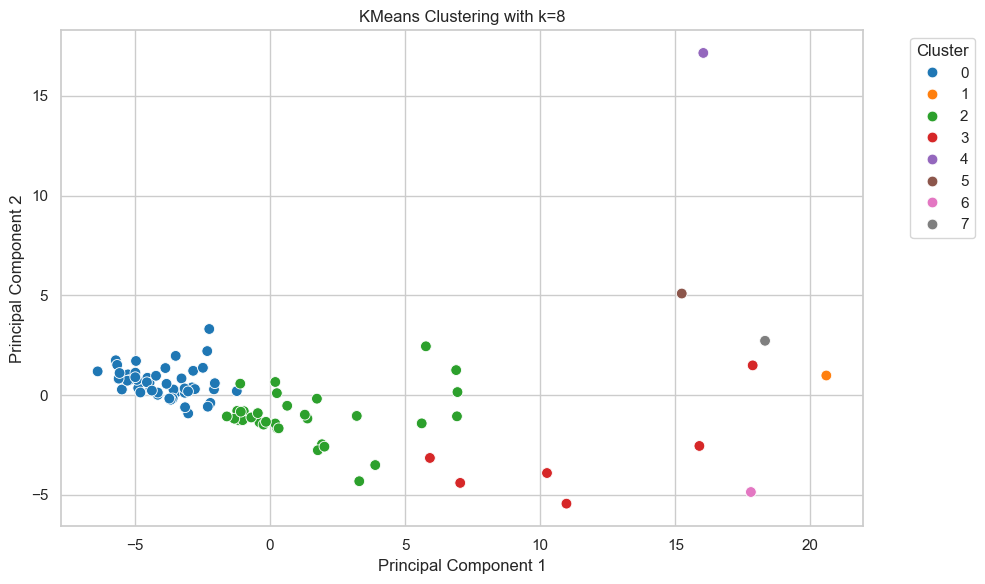

In [6]:
# plot kmeans = 8
plot_clusters(dfp[pc_cols], labels_8, "KMeans Clustering with k=8")